In [1]:
from report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

classical_cartpole, _ = preprocess_results('classicalLunarLander-v2')
quantum_cartpole, _ = preprocess_results('quantumLunarLander-v2')
quantum_cartpole_TR, _ = preprocess_results('quantumLunarLander-v2_TR')

In [2]:
def get_best(df, is_quantum=False):
    if is_quantum:
        df = df[df['layers'] % 2 == 1]

    best_df = df.groupby(['trial_id', 'episode']).agg({'evaluation_score': 'mean'}).reset_index()
    best_df = best_df.groupby(['trial_id']).agg({'evaluation_score': 'max'}).reset_index()
    best_df = pd.merge(best_df, df, on=['trial_id', 'evaluation_score'], how='left')

    return best_df

In [3]:
best_classical_cartpole = get_best(classical_cartpole, is_quantum=False)
best_quantum_cartpole = get_best(quantum_cartpole, is_quantum=True)
best_quantum_cartpole_TR = get_best(quantum_cartpole_TR, is_quantum=True)

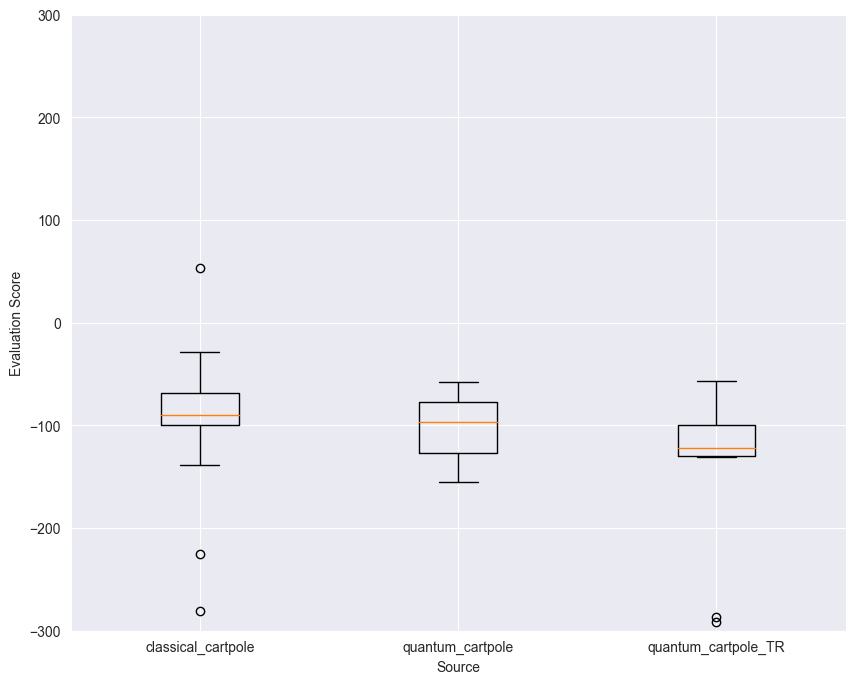

In [8]:
import matplotlib.pyplot as plt

# Create a list of dataframes and corresponding labels
data = [best_classical_cartpole['evaluation_score'], best_quantum_cartpole['evaluation_score'], best_quantum_cartpole_TR['evaluation_score']]
labels = ['classical_cartpole', 'quantum_cartpole', 'quantum_cartpole_TR']

# Create the violin plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(data)

ax.set_xlabel('Source')
ax.set_ylabel('Evaluation Score')
ax.set_ylim([-300, 300])
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(labels)
plt.savefig('best_cartpole.png')
plt.show()
